#  <center> Using Machine Learning (ML) in Systems Biology </center>

<center>by Daniel Marri </center>

Introduction
------------

The succesive advent of genetic engineering and system biology as effective tools to engineer biological cells has made varied helpful applications starting from the assembly of renewable biofuels and other bioproducts, to applications in human health making the expectation of associate industrial biology impacting each aspect of human activities [1]. The advance in system or computational biology has lead to the availability of nemurous data being generated from biological experiments, quantifying molecular variables such as gene, protein, and metabolite abundance, microbiome composition, and population-wide genetic variation, to name just a few that is very difficult to use the traditional Mathematical models to leverage these data and predict the behavior of a biological system systems. Even though mathematical models arguably,  the most widely used and successful modeling technique in metabolic engineering involves analysis of internal metabolic fluxes (i.e., reaction rates) through stoichiometric models of metabolism, it is still nascent and not able to provide the high accuracy predictions that we are accustomed to seeing in other engineering fields[2]. 

Hence the need for Machine learning tools or algorithm to integrate large scale heterogeneous data (e.g. clinical,
imaging, and genomic data), and allow researchers to better understand the genetic basis of disease and identify the optimal therapeutic approach. Machine learning is a discipline in computer science where machines (i.e., computers algorithms) are programmed to learn and  find out patterns from data. The learning itself is based on a set of mathematical rules and statistical assumptions.A common objective in machine learning is to create a predictive model based on factual affiliations among features from a given dataset [3]. 

In the area of system biology, supervised, unsupervised and reinforcement  machine learning algorithms are used in learning biological datasets to make predictions. In this report, I do discuss some of the applications of machine learning in system biology and an example of the algorithms. 

# Applications of Machine Learning in System Biology

There are several applications of machine learning in system biology. Machine learning algorithms are used in:

Identifying gene coding regions; Within the field of genomics, next-generation sequencing has quickly progressed the field by sequencing a genome in a brief time. This is due to the fact that macghine learning algorithms are applied in finding ene coding regions in a genome like the BedTools library in Python. These gene prediction machine learning algorithims are  more sensitive than typical homolog based sequence searches.

Structure prediction; In proteomics, Protein Protein interactions and Gene Regulatory Networks are been analysed using machine Learning algorithms. Most of these algorithms incorperate the use of graph theory to represent the schematic diagram of the system to be analysed.Example of these algorithms are the Autoregressive exgeneous variables (ARX) model, for time series dataset, the Sparse identification of nonlinear dynamical systems (SINDy) and the Implicit Sparse identification of nonlinear dynamical systems(Implicit SINDy). 



In conclusion, machine learning algorithms  are changing the way biologists carry out research, interpret it, and apply it to solve problems. As science grows increasingly interdisciplinary it is only inevitable that biology will continue to borrow from machine learning, or better still, machine learning will lead the way.Modern biology can benefit from the advancements made in the area of machine learning. Caution should be taken when judging the superiority of some machine learning approaches over other categories of methods. It is argued that the success or failure of machine learning approaches on a given problem is sometimes a matter of the quality indices used to evaluate the results, and these may vary strongly with the expertise of the user.

# Example of Machine Learning algorithm used in System Biology.




This example uses the Sparse identification of nonlinear dynamical systems (SINDy)  applied to a simple linear and nonlinear dynamical systems to generate data from the system, train the data and  plot the trajectories predicted by the SINDy model against those of the true governing equations.

https://pysindy.readthedocs.io/en/latest/examples/2_introduction_to_sindy.html

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from sklearn.linear_model import Lasso
from scipy.io import loadmat

import pysindy as ps

### Linear 2D ODE

The first example shows a demonstration of SINDy on a linear two-dimensional damped harmonic oscillator.

We generate training data by integrating the following linear system of differential equations with initial condtion $(2,0)$.

$$ \frac{d}{dt} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix} -0.1 & 2 \\ -2 & -0.1 \end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} $$

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat

import pysindy as ps

In [2]:
# Generate training data

def f(x, t):
    return [
        -0.1 * x[0] + 2 * x[1],
        -2 * x[0] - 0.1 * x[1] 
    ]


dt = 0.01
t_train = np.arange(0, 25, dt)
x0_train = [2, 0]
x_train = odeint(f, x0_train, t_train)

Next we fit a SINDy model to the training data, finding that it recovers the correct governing equations.

In [3]:
# Fit the model
stlsq_optimizer = ps.STLSQ(threshold=.01, alpha=.5)

model = ps.SINDy( optimizer=stlsq_optimizer)
model.fit(x_train, t=dt)
model.print()

x0' = -0.100 x0 + 2.000 x1
x1' = -2.000 x0 + -0.100 x1


The learned model can be used to evolve initial conditions forward in time. Here we plot the trajectories predicted by the SINDy model against those of the true governing equations.

C:\Users\marri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


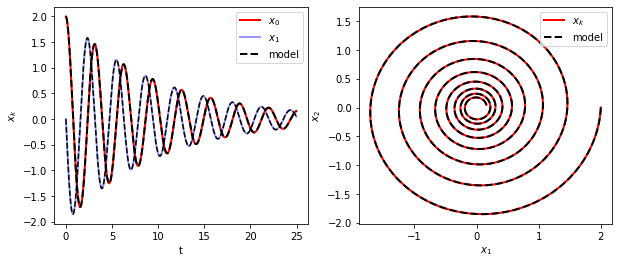

In [4]:
# Simulate and plot the results

x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

References
--------------

[1] National Research Council. Industrialization of Biology: A Roadmap to Accelerate the Advanced Manufacturing of Chemicals. Washington, DC: The National Academies Press. https://doi.org/10.17226/19001 (2015).

[2] Tompson, J. et al. Accelerating eulerian fluid simulation with convolutional networks. arXiv preprint arXiv:1607.03597 (2016).

[3]. Martin, H. G. et al. A method to constrain genome-scale models with 13C labeling data. PLoS. Comput. Biol. 11, e1004363 (2015).

[4]. Hand DJ (2006) Classifier technology and the illusion of progress. Stat Sci 21: 1–14.